In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
# Loading Data
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Exploration

In [3]:
data = data.set_index('CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# Structure of data
data.shape

(200, 4)

In [5]:
# Data Statistics
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Checking for Null Values
data.isna().sum().to_frame('Null Values')

,Null Values
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male':1})

In [8]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


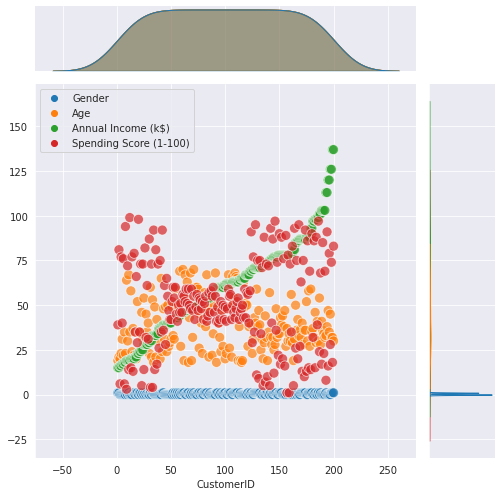

In [9]:
sns.jointplot(data=data, s=100, alpha=0.7, height=7)
plt.show()

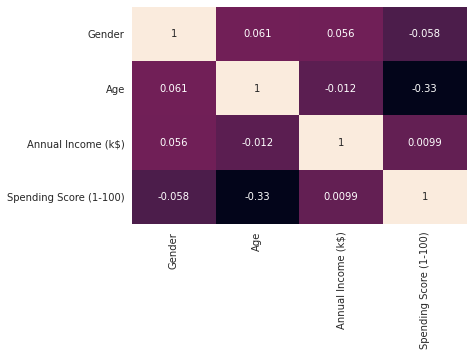

In [10]:
sns.heatmap(data.corr(), annot=True, cbar=False)
plt.show()

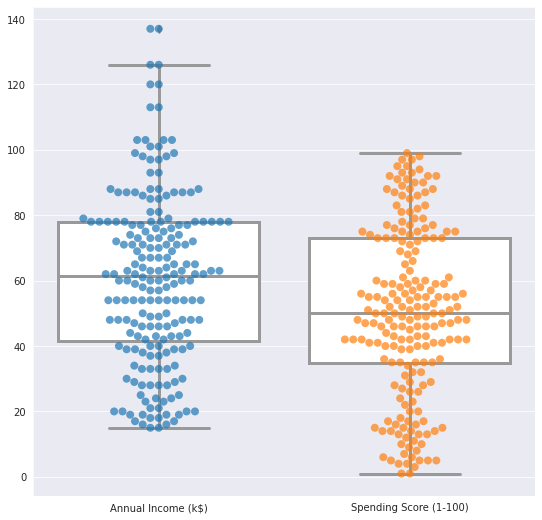

In [11]:
ndata = data.iloc[:,2:]
plt.figure(figsize=(9,9))
sns.boxplot(data=ndata, color='white', linewidth=3)
sns.swarmplot(data=ndata, s=8, alpha=0.7)
plt.show()

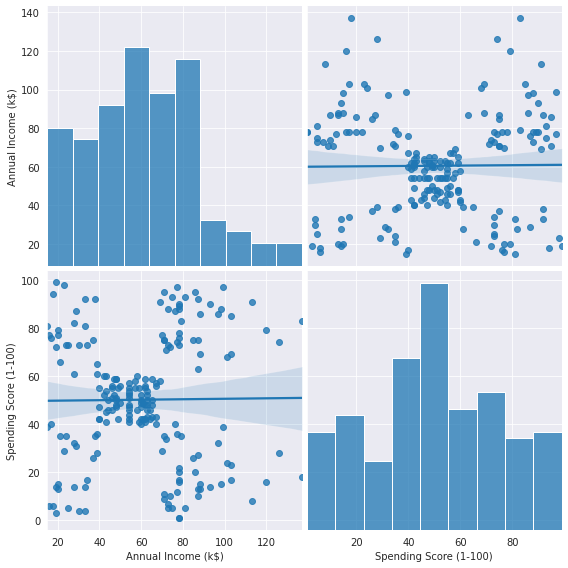

In [12]:
sns.pairplot(ndata, kind='reg', height=4)
plt.show()

# K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

# Preparing Data - Annual Income & Spending Score are taken
X = ndata.values

In [14]:
wcss = []
for i in range(1,11):
    kmeans_c = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_c.fit(X)
    wcss.append(kmeans_c.inertia_)
    print(f'wcss {i}: {kmeans_c.inertia_}')

wcss 1: 269981.28000000014
wcss 2: 181363.59595959607
wcss 3: 106348.37306211119
wcss 4: 73679.78903948837
wcss 5: 44448.45544793369
wcss 6: 37265.86520484345
wcss 7: 30259.657207285458
wcss 8: 25095.703209997544
wcss 9: 21830.04197804944
wcss 10: 20736.67993892413


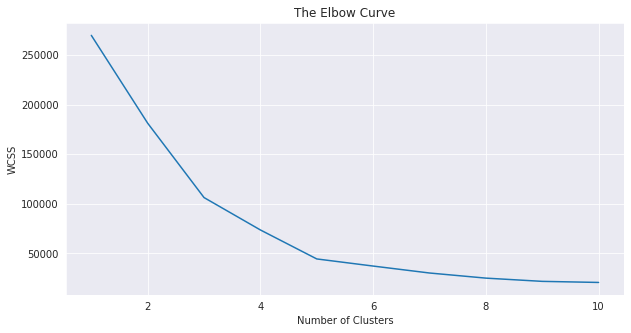

In [15]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* Number of Clusters: 5

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_means = kmeans.fit_predict(X)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

# Visualization

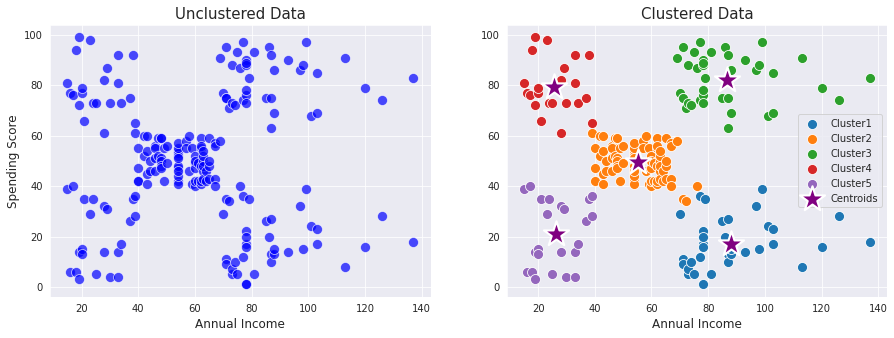

In [18]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Unclustered Data', fontsize=15)
ax[0].set_xlabel('Annual Income', fontsize=12)
ax[0].set_ylabel('Spending Score', fontsize=12)
sns.scatterplot(data.iloc[:,2], data.iloc[:,-1], ax=ax[0], s=100, color='blue', alpha=0.7)
ax[1].set_title('Clustered Data', fontsize=15)
ax[1].set_xlabel('Annual Income', fontsize=12)
for i in range(0,5):
    sns.scatterplot(X[y_means == i, 0], X[y_means == i, 1], s=100, label='Cluster'+str(i+1), ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=700, marker='*', 
                color='purple', label='Centroids', ax=ax[1])
fig.show()

## Thank You!